Decision tree learning is a powerful method for inductive inference, capable of handling noisy data and learning disjunctive expressions. Algorithms like ID3, ASSISTANT, and C4.5 explore a fully expressive hypothesis space, preferring smaller trees for better generalization.

# 1. INTRODUCTION

Decision tree learning approximates discrete-valued target functions by representing the learned function as a decision tree. These trees can be converted into if-then rules for better readability. Widely used in inductive inference, decision trees have been successfully applied to tasks like medical diagnosis and credit risk assessment.

# 2. DECISION TREE REPRESENTATION

Decision trees classify instances by sorting them from the root to a leaf node, where the final classification is assigned. Each node tests an attribute, and branches represent possible attribute values. The classification process continues recursively until a leaf is reached.
For example, a decision tree for PlayTennis determines if a Saturday morning is suitable for playing tennis based on conditions like Outlook, Temperature, Humidity, and Wind. An instance (Sunny, Hot, High Humidity, Strong Wind) would follow the tree’s leftmost path and be classified as No (not suitable for tennis).

Decision trees represent a disjunction of conjunctions, meaning each path from root to leaf forms a conjunction of attribute tests, and the tree itself is a disjunction of these conditions. The PlayTennis decision tree can be expressed as:
$ (Outlook = Sunny \land Humidity = Normal) \vee (Outlook = Overcast) \vee (Outlook = Rain \land Wind = Weak) $

# 3. APPROPRIATE PROBLEMS FOR DECISION TREE LEARNING

Decision tree learning is best suited for problems where:
- **Instances are represented by attribute-value pairs**: Each instance has a fixed set of attributes (e.g., Temperature) with discrete values (e.g., Hot, Mild, Cold). Extensions allow handling real-valued attributes.
- **The target function has discrete output values**: Decision trees typically classify instances into categories (e.g., Yes/No) but can be extended for multi-class and real-valued outputs, though the latter is less common.


# 4. THE BASIC DECISION TREE LEARNING ALGORITHM

Decision tree learning algorithms typically use a **top-down, greedy search** approach. This method is exemplified by **ID3** and its successor **C4.5**.

The **ID3** algorithm builds decision trees from the top down. It starts by choosing the best attribute to test at the root, based on how well it classifies the data. A new branch is created for each possible value of this attribute, and training examples are sorted accordingly. This process repeats for each branch, selecting the best attribute at every step. The algorithm follows a **greedy approach**, meaning it does not go back to revise previous choices. A simplified version is used for yes/no classification problems.


## 4.1 Which Attribute Is the Best Classifier?

In the **ID3 algorithm**, the key decision is choosing which attribute to test at each node. The goal is to pick the attribute that best helps classify the examples. To measure this, a statistical property called **information gain** is used. It shows how well an attribute separates the training data based on their correct classifications. ID3 selects attributes with the highest information gain at each step while building the tree.

### 4.1.1 Entropy Measures Homogenity of Examples

To define **information gain**, we first introduce **entropy**, a concept from **information theory** that measures the impurity of a set of examples.
For a dataset S with **positive (p+) and negative (p-)** examples, entropy is calculated as:


$ \text{Entropy}(S) = -(P+) \log_2 (P+) - (P-) \log_2 (P-) $


This formula quantifies how mixed the dataset is. **Higher entropy** means more impurity (equal mix of positive and negative examples), while **lower entropy** means the data is more pure (mostly one class).

Given a dataset S with **9 positive and 5 negative** examples, written as **[9+, 5-]**, the entropy is calculated using the Entropy formula

where:
- **(P+)** = $( \frac{9}{14}$  \)(fraction of positive examples)
- **(P-)** = $( \frac{5}{14}$  \) (fraction of negative examples)

Substituting the values:

$ \text{Entropy}(S) = -(P+) \log_2 (P+) - (P-) \log_2 (P-) $

$ \text{Entropy}(S) = -\left( \frac{9}{14} \log_2 \frac{9}{14} + \frac{5}{14} \log_2 \frac{5}{14} \right) $

$ \text{Entropy}(S) = 0.41+0.53)=0.94 $


- **Entropy measures the impurity of a dataset**:
    - If all examples belong to the same class (pure set), entropy is 0.
        - Example: If all instances are positive ($p+ = 1$, $p- = 0$): 
        $$ \text{Entropy}(S) = - (1 \log_2 1 + 0 \log_2 0) = 0 $$
        - Similarly, if all are negative ($p+ = 0$, $p- = 1$), entropy is also 0.
    - If the dataset is evenly split between positive and negative (maximally impure), entropy is 1.
        - Example: If $p+ = 0.5$, $p- = 0.5$:
        $$ \text{Entropy}(S) = - (0.5 \log_2 0.5 + 0.5 \log_2 0.5) = 1 $$
    - For imbalanced datasets, entropy falls between 0 and 1, depending on the degree of impurity.


### Simplified Explanation of the ID3 Algorithm:

1. **Start by creating the root node of the tree.**
2. **Check the training examples:**
    - If all examples belong to the same class (all positive or all negative), return a single-node tree labeled with that class.
    - If there are no more attributes left to test, label the node with the most common class in the examples.
3. **Choose the best attribute** (the one that best separates the examples) and make it the decision node.
4. **For each possible value of the chosen attribute:**
    - Create a branch.
    - If no examples match this value, add a leaf node labeled with the most common class.
    - Otherwise, recursively repeat the process on the subset of examples that match this value.
5. **Continue until all nodes are classified.**

The algorithm builds the tree **top-down**, selecting the **best attribute** at each step using **information gain**.


### 4.1.2 Information Gain measures the expected reduction in Entropy

### Information Gain

Information gain measures how much an attribute reduces the uncertainty (entropy) in a dataset after splitting based on that attribute. It tells us how useful an attribute is for classifying data.

#### Formula:
$$ \text{Gain}(S, A) = \text{Entropy}(S) - \sum_{v \in \text{Values}(A)} \frac{|S_v|}{|S|} \text{Entropy}(S_v) $$

Where:
- **Entropy(S)** = Original impurity before splitting.
- **Values(A)** = All possible values of attribute A.
- **Sᵥ** = Subset of S where A = v.
- **$ \frac{|S_v|}{|S|} $** = Proportion of data in each subset.
- **Entropy(Sᵥ)** = Entropy of that subset.

#### How It Works:
1. **Calculate entropy of the original dataset.**
2. **Split the dataset** based on an attribute.
3. **Compute entropy for each subset.**
4. **Calculate weighted average** of entropies after the split.
5. **Subtract from original entropy** to get the information gain.

Higher information gain means a better attribute because it reduces uncertainty more effectively.


In [19]:
import pandas as pd

# Create the dataset as a dictionary
data = {
    "Day": ["D1", "D2", "D3", "D4", "D5", "D6", "D7", "D8", "D9", "D10", "D11", "D12", "D13", "D14"],
    "Outlook": ["Sunny", "Sunny", "Overcast", "Rain", "Rain", "Rain", "Overcast", "Sunny", "Sunny", "Rain", "Sunny", "Overcast", "Overcast", "Rain"],
    "Temperature": ["Hot", "Hot", "Hot", "Mild", "Cool", "Cool", "Cool", "Mild", "Cool", "Mild", "Mild", "Hot", "Hot", "Mild"],
    "Humidity": ["High", "High", "High", "High", "Normal", "Normal", "Normal", "High", "Normal", "Normal", "Normal", "High", "Normal", "High"],
    "Wind": ["Weak", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Weak", "Weak", "Strong", "Strong", "Weak", "Strong"],
    "PlayTennis": ["No", "No", "Yes", "Yes", "Yes", "No", "Yes", "No", "Yes", "Yes", "Yes", "Yes", "Yes", "No"]
}

# Create the DataFrame
df = pd.DataFrame(data)
df = df.set_index("Day");

# Display the DataFrame
df

,Outlook,Temperature,Humidity,Wind,PlayTennis
Day,,,,,
D1,Sunny,Hot,High,Weak,No
D2,Sunny,Hot,High,Strong,No
D3,Overcast,Hot,High,Weak,Yes
D4,Rain,Mild,High,Weak,Yes
D5,Rain,Cool,Normal,Weak,Yes
D6,Rain,Cool,Normal,Strong,No
D7,Overcast,Cool,Normal,Strong,Yes
D8,Sunny,Mild,High,Weak,No
D9,Sunny,Cool,Normal,Weak,Yes


### Example: Calculating Information Gain for Attribute "Wind"

**Given Data:**

**Values(Wind) = Weak, Strong** 
- **S = 14** (total examples)
- **S⁺ = 9** (positive examples)
- **S⁻ = 5** (negative examples)
- **S weak = 8** (6 positive, 2 negative)
- **S strong = 6** (3 positive, 3 negative)

---

**Step 1: Compute Entropy of S**

The entropy for the original set \( S \) is calculated as:
$$ \text{Entropy}(S) = -\left(\frac{9}{14} \log_2 \frac{9}{14} + \frac{5}{14} \log_2 \frac{5}{14} \right) $$

Substituting the values:
$$ \text{Entropy}(S) = -(0.6429 \log_2 0.6429 + 0.3571 \log_2 0.3571) $$  
$$ = 0.940 $$

---

**Step 2: Compute Entropy for $ S_{\text{weak}} $**

The entropy for the weak wind subset is:
$$ \text{Entropy}(S_{\text{weak}}) = -\left(\frac{6}{8} \log_2 \frac{6}{8} + \frac{2}{8} \log_2 \frac{2}{8} \right) $$

Substituting the values:
$$ \text{Entropy}(S_{\text{weak}}) = -(0.75 \log_2 0.75 + 0.25 \log_2 0.25) $$  
$$ = 0.811 $$

---

**Step 3: Compute Entropy for $ S_{\text{strong}} $**

The entropy for the strong wind subset is:
$$ \text{Entropy}(S_{\text{strong}}) = -\left(\frac{3}{6} \log_2 \frac{3}{6} + \frac{3}{6} \log_2 \frac{3}{6} \right) $$

Substituting the values:
$$ \text{Entropy}(S_{\text{strong}}) = -(0.5 \log_2 0.5 + 0.5 \log_2 0.5) $$  
$$ = 1.000 $$

---

**Step 4: Compute Weighted Entropy after Splitting by Wind**

The weighted entropy after splitting by wind is:
$$ \text{Weighted\_Entropy} = \left(\frac{8}{14} \times 0.811 \right) + \left(\frac{6}{14} \times 1.000 \right) $$  
$$ = (0.571 \times 0.811) + (0.429 \times 1.000) $$  
$$ = 0.892 $$

---

**Step 5: Compute Information Gain for Wind**

Finally, the information gain for the attribute "Wind" is:
$$ \text{Gain}(S, \text{Wind}) = \text{Entropy}(S) - \text{Weighted\_Entropy} $$  
$$ = 0.940 - 0.892 $$  
$$ = 0.048 $$

Thus, the information gain for splitting on Wind is **0.048**.

---
Similarly Caliculate Information Gain for each attribute:
1. **Gain for Humidity**:

$$
\text{Gain}(S, \text{Humidity}) = 0.151
$$

2. **Gain for Temperature**:

$$
\text{Gain}(S, \text{Temperature}) = 0.029
$$

3. **Gain for Outlook**:

$$
\text{Gain}(S, \text{Outlook}) = 0.246
$$

4. **Gain for Wind**:

$$ \text{Gain}(S, \text{Wind}) = 0.048\text{( previous example)} $$


---


We can clearly observe that **IG(S, Outlook)** has the highest information gain of **0.246**, which makes **Outlook** the best choice for the root node. At this point, the decision tree looks like this:

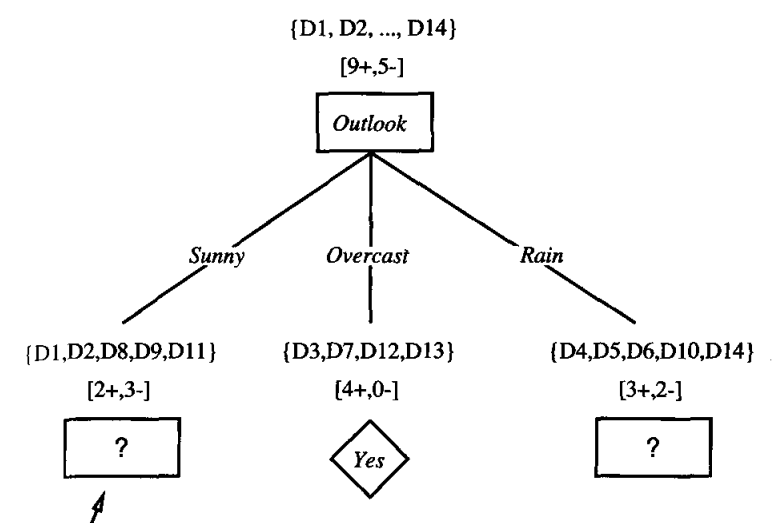

In [23]:
from IPython.display import Image

# Display an image
Image(filename='./images/DT1.png')

Observe that every example where **Outlook = Overcast** is also a positive example for **PlayTennis**. As a result, this node in the tree becomes a leaf node with the classification **PlayTennis = Yes**. In contrast, the branches corresponding to **Outlook = Sunny** and **Outlook = Rain**, these subsets still contain a mix of classifications (both Yes and No for PlayTennis),have nonzero entropy so further splitting is necessary on these branches.

The process of choosing a new attribute and splitting the training examples is repeated for each non-terminal node. This time, we only consider the training examples that reach that specific node. Attributes that were already used higher up in the tree are ignored, ensuring that each attribute appears only once along any path. 

This process continues until one of these two conditions is met:

1. All attributes have already been used along this path.
2. The training examples at the leaf node all have the same target value (meaning their entropy is zero).

Let's compute the final results for Gain(S_sunny, Humidity), Gain(S_sunny, Temperature), and Gain(S_sunny, Wind).
#### 1. **Gain(S_sunny, Humidity)**

$$
\text{Gain}(S_{\text{sunny}}, \text{Humidity}) = 0.970 - \left( \frac{3}{5} \times 0.0 + \frac{2}{5} \times 0.0 \right) = 0.970
$$

---

#### 2. **Gain(S_sunny, Temperature)**

$$
\text{Gain}(S_{\text{sunny}}, \text{Temperature}) = 0.970 - \left( \frac{2}{5} \times 0.0 + \frac{2}{5} \times 1.0 + \frac{1}{5} \times 0.0 \right) = 0.570
$$

---

#### 3. **Gain(S_sunny, Wind)**

$$
\text{Gain}(S_{\text{sunny}}, \text{Wind}) = 0.970 - \left( \frac{2}{5} \times 1.0 + \frac{3}{5} \times 0.918 \right) =  0.0192
$$


Since Humidity has the highest information gain (0.970), it is chosen as the next splitting attribute. The Rain node still needs further splitting

If we calculate the **information gain** for **Wind** and **Humidity** within the **Rain** subset:

$$ \text{Gain}(Rain, Wind) = 0.971 \quad (\text{Highest}) $$

$$ \text{Gain}(Rain, Humidity) = 0.020 $$

Since **Wind** has the highest gain, we split **Rain** based on **Wind**.


### Final Decision Tree

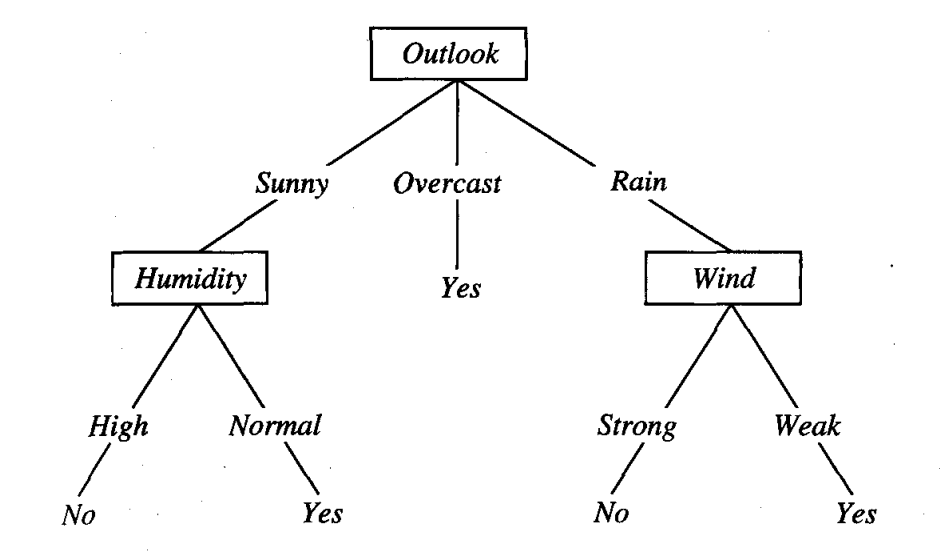

In [25]:
Image(filename='./images/DT2.png')

# 5. HYPOTHESIS SPACE SEARCH IN DECISION TREE LEARNING

ID3, like other inductive learning algorithms, can be viewed as searching through a **hypothesis space** for the best hypothesis that fits the given training data. In the context of ID3, this hypothesis space consists of all possible **decision trees** that could be constructed from the available attributes.

#### Search Strategy: Simple-to-Complex

ID3 uses a **hill-climbing search strategy**, where the algorithm starts with the simplest possible hypothesis (an empty tree) and gradually considers more complex hypotheses. The goal is to find a decision tree that correctly classifies the training examples. This process involves evaluating the current decision tree and selecting attributes based on the **information gain** measure, which guides the search for the most effective hypothesis. The search process proceeds from the simplest tree to more complex trees.

The search strategy follows a **simple-to-complex** approach. It does not exhaustively explore all possible hypotheses but incrementally builds a tree by selecting the most promising attributes at each step.

#### Evaluation Function: Information Gain

The evaluation function driving the search is the **information gain measure**. Information gain helps ID3 select the most relevant attribute at each level of the decision tree, and this selection process is central to the algorithm’s decision-making. By choosing the attribute with the highest information gain, ID3 aims to create a tree that partitions the training examples in the most informative way.

#### Limitation: No Backtracking

One key limitation of the basic ID3 algorithm is its **lack of backtracking**. Once ID3 selects an attribute to test at a particular node, it does not reconsider that choice or explore alternative paths in the search space. This characteristic makes ID3 susceptible to **locally optimal solutions** — trees that may be good based on the current path but suboptimal when considering the overall problem.

For instance, ID3 might settle on a decision tree that appears to be optimal at each individual step, but in the broader search space, there may exist a better decision tree that was never explored due to the lack of backtracking. This is one of the risks of using a **hill-climbing** search without backtracking.

#### Extending ID3: Post-Pruning

A potential solution to the problem of local optima in ID3 is to introduce a form of **backtracking** known as **post-pruning**. This involves initially allowing ID3 to construct the full tree and then later trimming or simplifying parts of the tree to improve its performance, such as handling noise or preventing overfitting. Post-pruning helps avoid overfitting to the training data by making the decision tree more general and robust.

### Summary of hypothesis space search

ID3 searches through the **hypothesis space of all possible decision trees** by making **greedy decisions** at each step. The final tree represents a **single hypothesis** about the target concept (PlayTennis). 

Since ID3 does not explore all possible trees, **it finds a good solution but not necessarily the best one**. The search process is **guided by information gain**, ensuring that each decision reduces entropy and leads to a more refined classification.

# 6. INDUCTIVE BIAS IN DECISION TREE LEARNING

ID3 (Iterative Dichotomiser 3) is a decision tree algorithm that employs a greedy, hill-climbing search strategy to build decision trees from training examples. The core idea behind ID3 is to generalize from the observed training examples and classify unseen instances based on the inductive bias it exhibits.

### Inductive Bias of ID3

Inductive bias refers to the set of assumptions that the learning algorithm makes about how to generalize from the training data to unseen instances. For ID3, the inductive bias can be understood as the algorithm's preference for certain types of decision trees when there are multiple trees that are consistent with the training data.

1. **Preference for Shorter Trees:**
   - The main inductive bias of ID3 is its preference for **shorter decision trees**. This means that ID3 will prefer decision trees with fewer nodes, even if they are not necessarily the absolute shortest possible tree.
   - The algorithm operates by searching through progressively more complex decision trees but tends to stop as soon as it finds a tree that classifies all training examples correctly. ID3 does not perform a full breadth-first search for the shortest tree, which would consider all trees of depth 1, depth 2, etc., in order to select the one with the fewest nodes.
   - While ID3 does not guarantee the absolute shortest tree, it aims for simplicity by selecting the first "acceptable" tree it encounters. 

2. **Preference for High Information Gain at the Root:**
   - ID3 uses the **information gain** heuristic to select attributes. It chooses the attribute that provides the highest information gain (i.e., the attribute that best splits the data) to be placed closest to the root of the tree.
   - This means that ID3 is biased toward **trees that place high information gain attributes near the root** of the tree, leading to a more efficient split of the data at the top levels of the tree.

3. **Hill-Climbing Search:**
   - ID3 uses a **greedy hill-climbing search** to build the tree, meaning it iteratively chooses the best attribute based on the information gain heuristic and continues to build the tree in a top-down manner. This strategy may not always find the globally optimal tree, but it strives to find an acceptable tree efficiently.
   - The algorithm's focus on information gain and the greedy approach means that ID3 may prioritize a tree structure that is "good enough" for the training data rather than exploring all possible trees that fit the data.

### Comparison to BFS-ID3

To better understand ID3's inductive bias, we can compare it to a hypothetical algorithm called **BFS-ID3** (Breadth-First Search ID3). This algorithm would perform a breadth-first search, considering trees of increasing depth, and return the **smallest consistent tree** at each level of search. The inductive bias of BFS-ID3 is clearer and more explicit: **shorter trees are preferred over longer trees**.

However, ID3 is more efficient than BFS-ID3 because it does not perform a full breadth-first search. Instead, it uses a greedy search strategy to find a reasonably small decision tree quickly. Although this does not guarantee the shortest tree, it reflects the same general preference for simpler trees.

### Final Inductive Bias of ID3

The inductive bias of ID3 can be summarized as follows:
- **Shorter trees** are preferred over more complex, longer trees.
- **Attributes with higher information gain** are preferred closer to the root, reflecting the importance of efficient attribute selection early in the decision tree.

In essence, ID3 prefers decision trees that are both simple (with fewer nodes) and efficient in terms of attribute selection (placing high information gain attributes at the top). However, due to the heuristic search and lack of full exploration of the hypothesis space, ID3 might not always produce the shortest or most optimal decision tree.

## 6.1 Restriction Biases and Preference Biases

The comparison between the **ID3 algorithm** and the **CANDIDATE-ELIMINATION algorithm** illustrates a key distinction in how inductive bias shapes learning and the types of hypotheses these algorithms can produce. Let’s break this down and analyze the difference between **preference bias** (as exhibited by ID3) and **restriction bias** (as seen in CANDIDATE-ELIMINATION).

### 1. **Inductive Bias in ID3: Preference Bias**

ID3 operates by searching through a **complete hypothesis space**, meaning it is capable of representing any finite discrete-valued function. This hypothesis space is unrestricted in terms of what kinds of decision trees it can generate, but ID3 does not search through the entire space. It employs a **greedy search strategy** to find a hypothesis (i.e., a decision tree) that is consistent with the training data. 

- **Search Strategy:** ID3 starts with simple trees and moves toward more complex ones, selecting trees that are simpler and that place the most informative attributes (in terms of information gain) closer to the root.
- **Inductive Bias:** The inductive bias of ID3 arises from the **search strategy**, which prefers shorter, simpler trees with attributes of higher information gain near the root. However, there is **no explicit restriction** on the kinds of trees that can be generated. ID3's hypothesis space is large and flexible, and its bias comes from the way it navigates this space.
- **Type of Bias:** This bias is termed a **preference bias** (or **search bias**) because it biases the search process toward certain kinds of hypotheses (simpler, information-rich trees), without excluding other potential hypotheses. Essentially, it "prefers" certain trees over others, but does not explicitly rule out any possible hypothesis.

### 2. **Inductive Bias in CANDIDATE-ELIMINATION: Restriction Bias**

The CANDIDATE-ELIMINATION algorithm, on the other hand, operates in a **restricted hypothesis space**. This algorithm is typically used in situations where you have a **version space**: a set of all hypotheses that are consistent with the training data. The hypothesis space in CANDIDATE-ELIMINATION is inherently limited—it only includes hypotheses that can be expressed by the language or representation used by the algorithm (e.g., a specific class of decision trees or rule sets).

- **Search Strategy:** CANDIDATE-ELIMINATION exhaustively searches through this restricted hypothesis space, identifying all hypotheses that are consistent with the training data. 
- **Inductive Bias:** The inductive bias in this case comes from the **expressive power** of the hypothesis representation. By restricting the search space to a particular subset of hypotheses (e.g., only considering hypotheses that are expressible in a certain form), it imposes a **categorical restriction** on the kinds of hypotheses that can be considered.
- **Type of Bias:** This type of bias is termed a **restriction bias** (or **language bias**) because it **limits the possible hypotheses** the algorithm can generate. If the target concept lies outside the representable hypothesis space, the algorithm may fail to find it, even if it is consistent with the training data.

### 3. **Preference Bias vs. Restriction Bias: Which is More Desirable?**

Given the need for inductive bias in order to generalize beyond training data, we can ask which type of bias is preferable: **preference bias** (as in ID3) or **restriction bias** (as in CANDIDATE-ELIMINATION).

- **Preference Bias (ID3):** Preference bias is generally more desirable because it allows the learning system to search within a **complete hypothesis space**, which ensures that the unknown target function can be represented somewhere in the space. The inductive bias merely influences the search for a good hypothesis, but it does not limit the search to a specific subset of possible hypotheses.
    - **Pros:** Flexibility in exploring a large set of potential hypotheses; allows the system to adapt to a wider range of functions.
    - **Cons:** It could lead to suboptimal solutions if the greedy search is trapped in a local optimum, but overall it ensures that no possible target function is excluded.

- **Restriction Bias (CANDIDATE-ELIMINATION):** Restriction bias is less desirable because it imposes a strict **categorical limitation** on the set of hypotheses considered. If the hypothesis space is too restrictive, there is a risk of **excluding the target concept altogether**, even if it fits the training data. 
    - **Pros:** It can provide a more structured search, and if the hypothesis space is appropriately chosen, it may be more efficient than searching through an unbounded space.
    - **Cons:** It excludes hypotheses that fall outside the restricted space, which could be problematic if the true target concept is not represented within the restricted space.

### Conclusion

- **Preference bias** (like in ID3) is often more desirable because it allows for flexibility and exploration of a complete hypothesis space, thus ensuring that the true target concept can be found.
- **Restriction bias** (like in CANDIDATE-ELIMINATION) is less desirable unless the restricted hypothesis space is carefully chosen to match the target concept. It can risk excluding the true function from the hypothesis space, limiting the system's ability to generalize effectively.

In practice, combining both types of bias can be useful, depending on the context and the learning task.

## 6.2 Why Prefer Simple Hypotheses? (Occam’s Razor and ID3)

ID3 tends to favor shorter decision trees when learning from data. But is choosing simpler models really the best approach for generalization? This question has sparked debate for centuries.

### Occam’s Razor
**"Prefer the simplest hypothesis that fits the data."**

Scientists often follow this principle—physicists, for instance, favor simpler explanations for complex phenomena, like planetary motion, rather than more complicated ones.

### Why Simpler Hypotheses Might Be Better

1. **Fewer Simple Models Exist**
   - There are far fewer short decision trees than long, complex ones.
   - If a simple tree fits the training data, it’s less likely to be a random coincidence.
   - On the other hand, many complex trees can fit the training data but may fail to perform well on new, unseen data.

2. **Avoiding Overfitting**
   - A highly complex tree (e.g., with 500 nodes) may simply memorize the training data, but this makes it less likely to generalize to new data.
   - A simpler tree (e.g., with 5 nodes) that fits the data well is more likely to be capturing meaningful patterns rather than fitting to noise or outliers in the data.